In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import torch

import constant
from constant import org_cols, wsr_cols, geo_pow_cols, semigeo_cols
from myplot import timelines, err_distribution
from models import model_evaluation, model_improvement, NRMSE_all, RMSE_all
path = "SL_SC_1/"
model_path = constant.model_path + path
plot_path = constant.plot_path + path
error_path = constant.error_path + path


# Evaluation

## load evaluation data, models, features

In [2]:
df_evl = pd.read_parquet(constant.SL_SC_EVL_path)
df_evl["TIME_CET"] = pd.to_datetime(df_evl["TIME_CET"])

In [3]:
model_original = torch.load(model_path + "original_model.pth")
model_wsr = torch.load(model_path + "wsr_model.pth")
model_geo = torch.load(model_path + "geo_model.pth")
model_semigeo = torch.load(model_path + "semigeo_model.pth")

In [4]:
# ahead = "Days_Ahead0_"
# original_errs= model_evaluation(df_evl, org_cols, model_original)
# wsr_errs= model_evaluation(df_evl, wsr_cols, model_wsr)
# geo_errs= model_evaluation(df_evl, geo_pow_cols, model_geo)
# semigeo_errs= model_evaluation(df_evl, semigeo_cols, model_semigeo)

In [5]:
ahead = "Days_Ahead1_"
ah = 1
original_errs= model_evaluation(df_evl, org_cols, model_original, ahead=ah)
wsr_errs= model_evaluation(df_evl, wsr_cols, model_wsr, ahead=ah)
geo_errs= model_evaluation(df_evl, geo_pow_cols, model_geo, ahead=ah)
semigeo_errs= model_evaluation(df_evl, semigeo_cols, model_semigeo, ahead=ah)

## RMSE

In [20]:
time = original_errs.index + 1

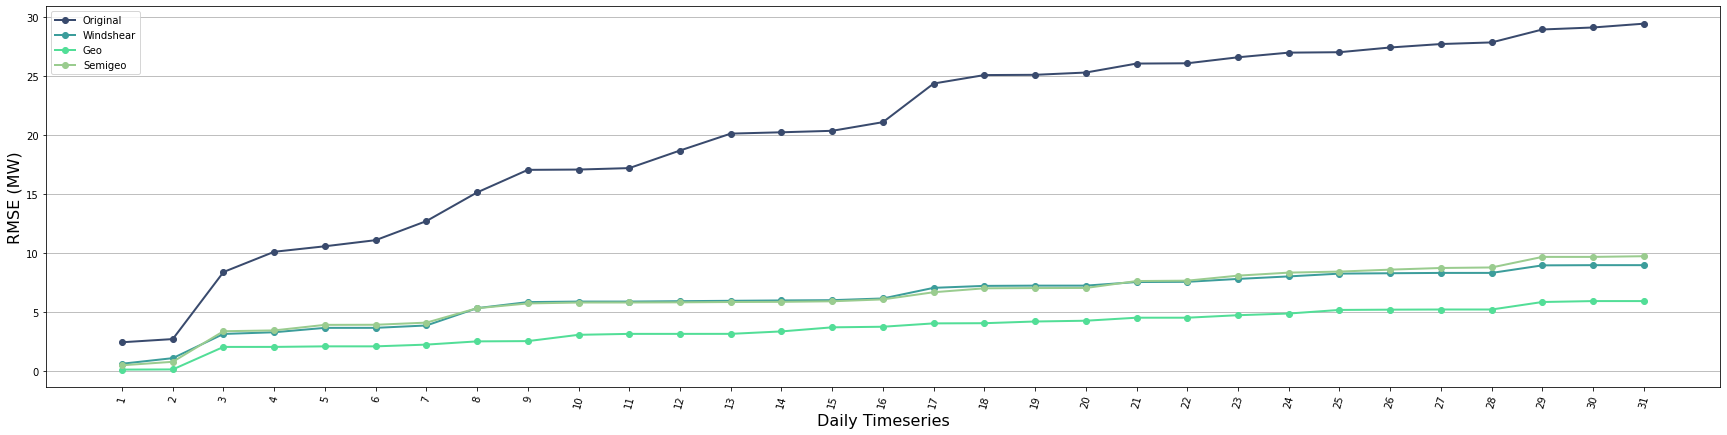

In [21]:
timelines(time, 
{"Original":original_errs["RMSE"], "Windshear":wsr_errs["RMSE"], "Geo":geo_errs["RMSE"], "Semigeo":semigeo_errs["RMSE"]}, ylabel="RMSE (MW)", xlabel="Daily Timeseries",path=plot_path+ahead+"RMSE.png")

In [8]:
# myplot.timelines(original_errs.index, 
# {"Original":original_errs["NRMSE"], "Windshear":wsr_errs["NRMSE"], "Geo":geo_errs["NRMSE"], "Semigeo":semigeo_errs["NRMSE"]}, ylabel="NRMSE (MW)", fulltime=False, path=plot_path+ahead+"NRMSE_Days.png")

### Error Distribution

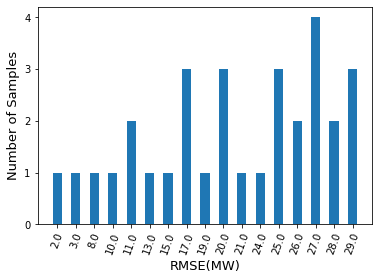

In [9]:
err_distribution(original_errs, path=plot_path+ahead+"OGN_Errdisb.png")

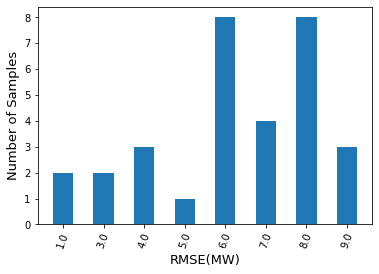

In [10]:
err_distribution(wsr_errs,path=plot_path+ahead+"WSR_Errdisb.png")

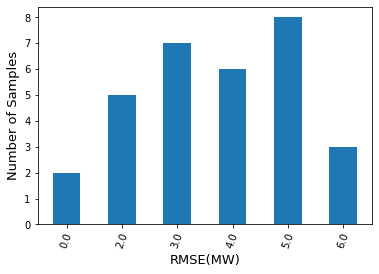

In [11]:
err_distribution(geo_errs, path=plot_path+ahead+"GEO_Errdisb.png")

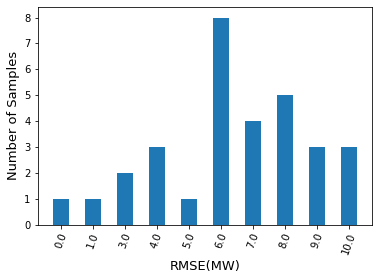

In [12]:
err_distribution(semigeo_errs, path=plot_path+ahead+"SEMIGEO_Errdisb.png")

## Prediction

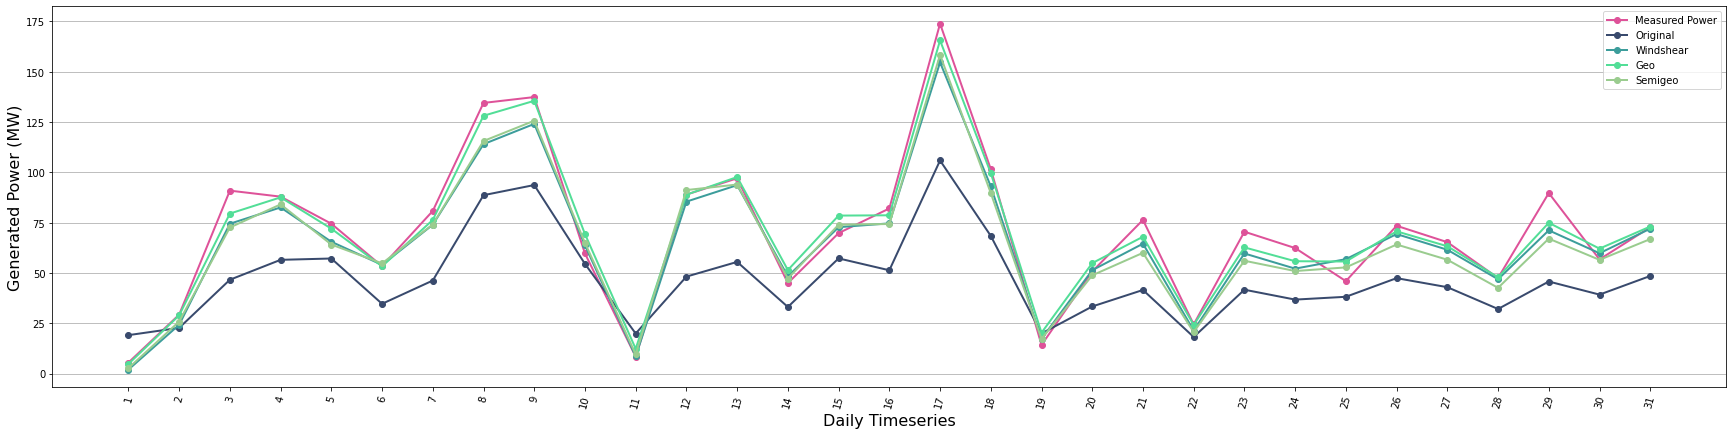

In [13]:
timelines(time, 
{"Measured Power":original_errs["VAERDI"], "Original":original_errs["pred"], "Windshear":wsr_errs["pred"], "Geo":geo_errs["pred"], "Semigeo":semigeo_errs["pred"]}, ylabel="Generated Power (MW)",xlabel="Daily Timeseries",  path=plot_path+ahead+"Power.png")

## Model Comparement

In [14]:
print(RMSE_all(original_errs))
print(RMSE_all(wsr_errs))
print(RMSE_all(geo_errs))
print(RMSE_all(semigeo_errs))

29.458339321692755
8.98497846954764
5.938963344577058
9.742269739038669


In [15]:
imp_RMSE, r2 = model_improvement({"Original": original_errs, "Windshear": wsr_errs, "Geo": geo_errs, "Semigeo": semigeo_errs}, "RMSE")
r2

{'Original': 0.337, 'Windshear': 0.938, 'Geo': 0.973, 'Semigeo': 0.927}

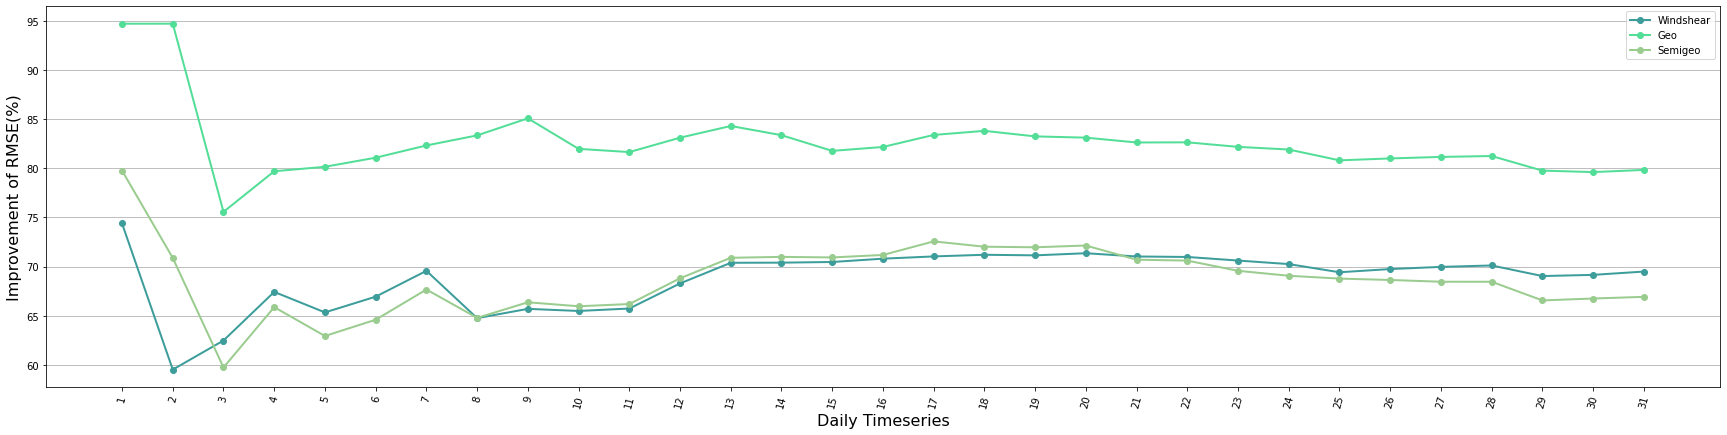

In [16]:
timelines(time, 
{"Windshear":imp_RMSE["Windshear"]["Original"], "Geo":imp_RMSE["Geo"]["Original"], "Semigeo":imp_RMSE["Semigeo"]["Original"]}, ylabel="Improvement of RMSE(%)",xlabel="Daily Timeseries",path=plot_path+ahead+"Improvement_RMSE.png")